<a href="https://colab.research.google.com/github/M-Sparsh-Mehra/Time-series-prediction-for-pollution-data/blob/main/ESN_and_LSTM_on_pollution_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/cknd/pyESN/master/pyESN.py

--2025-06-19 07:35:29--  https://raw.githubusercontent.com/cknd/pyESN/master/pyESN.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10789 (11K) [text/plain]
Saving to: ‘pyESN.py’

pyESN.py            100%[===================>]  10.54K  --.-KB/s    in 0.001s  

2025-06-19 07:35:29 (16.9 MB/s) - ‘pyESN.py’ saved [10789/10789]



In [ ]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns
from pyESN import ESN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

In [ ]:
data=pd.read_excel("/content/air_pollution_data.xlsx")

In [ ]:
data

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,2020-11-30,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,2020-12-01,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,2020-12-02,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,2020-12-03,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,2020-12-04,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53
...,...,...,...,...,...,...,...,...,...,...,...
23499,Visakhapatnam,2023-05-21,3,353.81,0.00,2.08,100.14,4.11,37.53,47.09,0.08
23500,Visakhapatnam,2023-05-22,3,380.52,0.00,3.77,82.97,5.07,32.17,43.44,1.74
23501,Visakhapatnam,2023-05-23,3,390.53,0.00,4.28,80.11,5.19,36.01,48.06,1.20
23502,Visakhapatnam,2023-05-24,3,300.41,0.00,1.36,95.84,2.21,30.17,48.89,0.00


# SORTING CITIES

I separated the dataset city wise and then copied data corresponding to each city in separate datasets in city separated dict named as "city_df".

To access the data for each city we can use city_df["city name"]

In [ ]:
unique_city = data["city"].unique()

# Sorting cities alphabetically
unique_city= sorted(unique_city)

In [ ]:
#dict to hold city wise data
city_df = {}

In [ ]:
for city in data["city"].unique():
    city_df[city] = data[data["city"] == city].copy()


In [ ]:
city_df

{'Ahmedabad':           city       date  aqi       co     no    no2      o3    so2   pm2_5  \
 0    Ahmedabad 2020-11-30    5   520.71   2.38  16.28  130.18  47.68   65.96   
 1    Ahmedabad 2020-12-01    5  1682.28   7.71  54.84    0.73  21.70  120.95   
 2    Ahmedabad 2020-12-02    5  1815.80  16.54  49.35    0.17  23.84  133.47   
 3    Ahmedabad 2020-12-03    5  2296.45  41.57  40.10    0.00  35.76  150.37   
 4    Ahmedabad 2020-12-04    5  2189.64  23.92  58.95    0.02  28.13  160.79   
 ..         ...        ...  ...      ...    ...    ...     ...    ...     ...   
 899  Ahmedabad 2023-05-21    3   350.48   0.00  10.28   42.92   9.78   18.87   
 900  Ahmedabad 2023-05-22    3   313.76   0.00   7.97   45.06   8.58   16.86   
 901  Ahmedabad 2023-05-23    3   390.53   0.00  12.34   38.27  13.35   18.04   
 902  Ahmedabad 2023-05-24    3   307.08   0.00   8.74   45.06   9.89   18.49   
 903  Ahmedabad 2023-05-25    3   283.72   0.00   6.51   42.92   7.63   12.62   
 
        pm10 

In [ ]:
city_df.keys()

dict_keys(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam'])

#City Data description

In [ ]:
city_df["Ahmedabad"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 904 entries, 0 to 903
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   city    904 non-null    object        
 1   date    904 non-null    datetime64[ns]
 2   aqi     904 non-null    int64         
 3   co      904 non-null    float64       
 4   no      904 non-null    float64       
 5   no2     904 non-null    float64       
 6   o3      904 non-null    float64       
 7   so2     904 non-null    float64       
 8   pm2_5   904 non-null    float64       
 9   pm10    904 non-null    float64       
 10  nh3     904 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 84.8+ KB


In [ ]:
city_df["Ahmedabad"].isnull().sum()

,0
city,0
date,0
aqi,0
co,0
no,0
no2,0
o3,0
so2,0
pm2_5,0
pm10,0


aqi
1     24
2    118
3     85
4    180
5    497
Name: count, dtype: int64


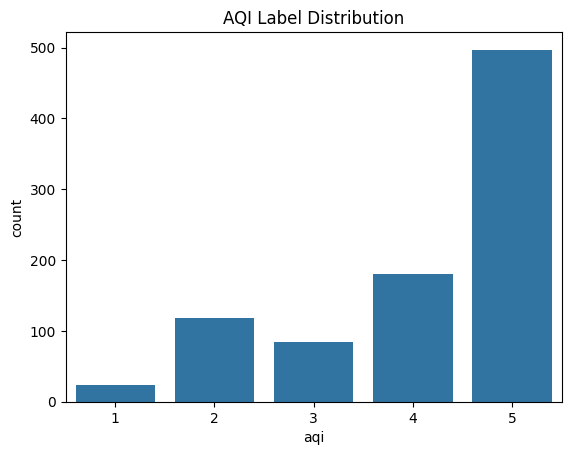

In [ ]:
print(city_df["Ahmedabad"]["aqi"].value_counts().sort_index())
sns.countplot(data=city_df["Ahmedabad"], x="aqi")
mp.title("AQI Label Distribution")
mp.show()

In [ ]:
city_df["Ahmedabad"].describe()

,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,904,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,2022-02-25 02:53:37.699115008,4.115044,1129.796969,10.324248,29.321327,27.862113,23.198717,81.831416,111.726482,16.245996
min,2020-11-30 00:00:00,1.000000,243.660000,0.000000,4.110000,0.000000,3.010000,5.500000,6.260000,0.670000
25%,2021-07-13 18:00:00,3.000000,433.920000,0.000000,14.355000,0.547500,13.230000,25.960000,47.995000,4.810000
50%,2022-02-24 12:00:00,5.000000,747.680000,0.050000,22.620000,21.370000,17.640000,59.950000,88.320000,11.910000
75%,2022-10-09 06:00:00,5.000000,1401.900000,7.877500,39.760000,46.490000,25.270000,105.587500,142.170000,19.760000
max,2023-05-25 00:00:00,5.000000,9826.660000,214.580000,156.280000,130.180000,204.090000,696.790000,773.860000,178.340000
std,NaN,1.180328,1111.950011,24.279473,20.684854,27.743093,19.604988,83.669152,98.238384,19.095387


# model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
ahmedabad_df=data[data["city"] == "Ahmedabad"].copy()

x = ahmedabad_df.drop(columns=["city", "aqi","date"])
y = ahmedabad_df["aqi"]

In [ ]:
# 4. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
x_train

,co,no,no2,o3,so2,pm2_5,pm10,nh3
188,253.68,0.01,13.02,28.61,19.31,18.09,42.06,2.25
744,1201.63,0.36,41.81,11.27,18.60,65.20,85.47,17.73
181,307.08,0.01,13.37,23.96,16.45,18.87,56.27,4.12
689,1028.06,0.61,31.87,12.52,15.97,81.84,104.16,17.73
724,1482.01,9.50,44.55,0.95,21.93,116.25,152.93,23.31
...,...,...,...,...,...,...,...,...
21,620.84,0.00,17.31,42.56,10.73,55.16,65.83,13.81
794,1201.63,0.08,37.01,23.25,24.32,116.36,144.48,20.27
209,413.90,0.10,13.37,15.56,11.09,19.88,32.81,4.94
782,660.90,0.00,18.85,67.95,13.47,70.02,87.15,13.30


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[-0.64164162, -0.4241412 , -0.8945988 , ..., -0.56358805,
        -0.54307963, -0.50228206],
       [ 2.30658954,  1.82880385,  1.74941608, ...,  2.05294003,
         2.0397531 ,  2.78613136],
       [-0.04970454, -0.4241412 ,  0.25005482, ...,  0.4453843 ,
         0.24418108, -0.06623567],
       ...,
       [ 0.0074896 , -0.4241412 , -0.65161011, ..., -0.53879869,
        -0.7286566 , -0.68887626],
       [-0.49008058, -0.40398061, -0.34019357, ..., -0.56529374,
        -0.64207356, -0.61512948],
       [ 0.03036383,  0.2950488 , -0.57154487, ..., -0.36072468,
        -0.50956046, -0.53643325]])

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)
#model eval
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.60      0.88      0.71        24
           3       0.00      0.00      0.00        17
           4       0.68      0.83      0.75        36
           5       0.94      0.97      0.96        99

    accuracy                           0.81       181
   macro avg       0.44      0.54      0.48       181
weighted avg       0.73      0.81      0.77       181



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: 

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 0,  5,  0,  0,  0],
       [ 0, 21,  0,  3,  0],
       [ 0,  9,  0,  8,  0],
       [ 0,  0,  0, 30,  6],
       [ 0,  0,  0,  3, 96]])

#Aizwal data

In [ ]:
aizawl_df=data[data["city"] == "Aizawl"].copy()

In [ ]:
aizawl_df

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
904,Aizawl,2020-11-30,1,213.62,0.04,0.31,64.37,0.69,4.93,5.50,0.82
905,Aizawl,2020-12-01,3,447.27,0.04,23.99,4.34,4.53,20.23,26.40,13.68
906,Aizawl,2020-12-02,2,387.19,0.52,18.68,1.33,2.77,18.55,23.94,7.73
907,Aizawl,2020-12-03,3,433.92,0.64,22.96,1.74,4.47,23.22,28.52,13.43
908,Aizawl,2020-12-04,4,480.65,1.36,25.02,0.91,4.29,37.69,43.85,13.30
...,...,...,...,...,...,...,...,...,...,...,...
1803,Aizawl,2023-05-21,1,280.38,0.00,0.94,39.70,0.41,4.67,6.32,0.30
1804,Aizawl,2023-05-22,2,293.73,0.00,1.65,16.27,0.54,14.69,18.16,0.48
1805,Aizawl,2023-05-23,2,307.08,0.00,2.27,9.12,0.64,20.87,26.45,0.49
1806,Aizawl,2023-05-24,2,287.06,0.00,1.44,15.56,0.42,11.07,13.52,0.35


## EDA

In [ ]:
x = aizawl_df.drop(columns=["city", "pm2_5","date"])
y = aizawl_df["pm2_5"]

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [ ]:
x

array([[-1.14060005, -1.31626618, -0.41223318, ..., -0.73045642,
        -0.89472645, -0.80507255],
       [ 0.13868338,  0.84055198, -0.41223318, ...,  1.5010252 ,
        -0.32703629,  1.89829321],
       [-0.50095833,  0.28595479, -0.14552841, ...,  0.47826279,
        -0.39385533,  0.64751356],
       ...,
       [-0.50095833, -0.45353891, -0.43445858, ..., -0.75951217,
        -0.32567818, -0.87444352],
       [-0.50095833, -0.63834311, -0.43445858, ..., -0.88735747,
        -0.67688554, -0.90387363],
       [-0.50095833, -0.73083751, -0.42334588, ..., -0.85249057,
        -0.61712868, -0.87864782]])

In [ ]:
y

,pm2_5
904,4.93
905,20.23
906,18.55
907,23.22
908,37.69
...,...
1803,4.67
1804,14.69
1805,20.87
1806,11.07


### time window


In [ ]:
train_len = 800
test_len = len(y)-train_len

In [ ]:
x_train, x_test = x[:train_len], x[train_len:train_len+test_len]
y_train, y_test = y[:train_len], y[train_len:train_len+test_len]

In [ ]:
len(y_train)

800

# ESN (Echo State Network)


In [ ]:
esn = ESN(n_inputs=x.shape[1],
          n_outputs=1,
          n_reservoir=500,
          spectral_radius=0.95,
          sparsity=0.1,
          random_state=0)

In [ ]:
# Train
esn.fit(x_train, y_train)

array([[ -7.49209511],
       [ 20.23778879],
       [ 15.00791491],
       [ 23.95570702],
       [ 36.95142985],
       [ 44.91908376],
       [ 44.0520121 ],
       [ 75.62467643],
       [100.08129576],
       [104.29321005],
       [ 79.35096484],
       [ 82.92938065],
       [ 65.57992746],
       [ 47.12505292],
       [ 63.13152275],
       [ 57.49610613],
       [ 39.84548435],
       [ 37.43073935],
       [ 37.22542581],
       [ 37.86491514],
       [ 32.87553148],
       [ 16.65157359],
       [ 32.14001179],
       [ 33.72335595],
       [ 39.21248225],
       [ 31.52778019],
       [ 28.89990647],
       [ 36.69806927],
       [ 26.33628575],
       [ 26.78765644],
       [ 29.11874007],
       [ 30.71802743],
       [ 18.00597937],
       [ 35.23217443],
       [ 29.18665391],
       [ 21.8032516 ],
       [ 26.36489924],
       [ 29.21760254],
       [ 25.33048432],
       [ 51.42901193],
       [ 43.36605646],
       [ 37.53650171],
       [106.53440873],
       [106

In [ ]:
y_pred = esn.predict(x_test, test_len)

In [ ]:
x_test

array([[ 7.78325093e-01,  3.16786254e-01, -3.45556987e-01,
         1.25435601e-01, -5.66997045e-01, -2.07452914e-01,
         1.10848642e+00, -7.14219641e-02],
       [ 1.41796681e+00,  9.02214920e-01,  8.78382616e-02,
        -8.97804194e-02, -7.52185622e-01, -5.09632716e-01,
         2.24386673e+00, -4.64524139e-01],
       [ 7.78325093e-01, -4.22707446e-01, -4.23345878e-01,
        -2.66670299e-01, -2.15910368e-01, -6.54911467e-01,
         1.06122418e+00, -4.05663920e-01],
       [ 1.41796681e+00,  4.40019819e-01, -4.34458577e-01,
        -5.68857177e-01,  1.80187350e+00, -2.07452914e-01,
         2.98403691e+00, -7.10475767e-01],
       [ 1.38683380e-01, -2.21752818e-02, -4.34458577e-01,
         2.63999340e-01,  9.22227760e-01,  6.52597292e-01,
         3.40882411e-01,  5.67631838e-01],
       [ 1.38683380e-01,  1.08711142e+00, -4.34458577e-01,
         1.30027922e+00,  2.75032265e-01,  2.26228585e+00,
         4.90546179e-01,  1.87096525e+00],
       [ 7.78325093e-01,  1.518475

In [ ]:
y_pred

array([[   70.03768461],
       [  105.22313517],
       [   70.90378656],
       [  124.83009234],
       [   47.99981129],
       [   52.86164523],
       [   56.15216358],
       [   56.07639592],
       [   61.5457545 ],
       [   64.14985216],
       [   70.58154218],
       [   94.78465103],
       [  108.95562664],
       [  108.16162456],
       [   69.70381009],
       [   77.2585261 ],
       [   62.75483769],
       [   66.91569001],
       [   98.22960485],
       [   65.46614594],
       [   79.19691181],
       [   74.2090482 ],
       [   56.7507215 ],
       [   83.64435241],
       [  106.30873881],
       [   68.18694008],
       [   48.91136336],
       [   70.95530183],
       [   41.03998235],
       [   45.53552064],
       [   61.23794927],
       [   93.80288489],
       [   95.52644877],
       [   73.76025888],
       [   96.55948498],
       [   30.92787379],
       [   22.93884997],
       [   21.63756288],
       [    8.61982673],
       [    8.6419308 ],


In [ ]:
y_test

,pm2_5
1704,67.48
1705,104.29
1706,59.51
1707,132.41
1708,40.78
...,...
1803,4.67
1804,14.69
1805,20.87
1806,11.07


In [ ]:
y_pred

array([[   70.03768461],
       [  105.22313517],
       [   70.90378656],
       [  124.83009234],
       [   47.99981129],
       [   52.86164523],
       [   56.15216358],
       [   56.07639592],
       [   61.5457545 ],
       [   64.14985216],
       [   70.58154218],
       [   94.78465103],
       [  108.95562664],
       [  108.16162456],
       [   69.70381009],
       [   77.2585261 ],
       [   62.75483769],
       [   66.91569001],
       [   98.22960485],
       [   65.46614594],
       [   79.19691181],
       [   74.2090482 ],
       [   56.7507215 ],
       [   83.64435241],
       [  106.30873881],
       [   68.18694008],
       [   48.91136336],
       [   70.95530183],
       [   41.03998235],
       [   45.53552064],
       [   61.23794927],
       [   93.80288489],
       [   95.52644877],
       [   73.76025888],
       [   96.55948498],
       [   30.92787379],
       [   22.93884997],
       [   21.63756288],
       [    8.61982673],
       [    8.6419308 ],


In [ ]:
time=np.arange(0,len(y_test))

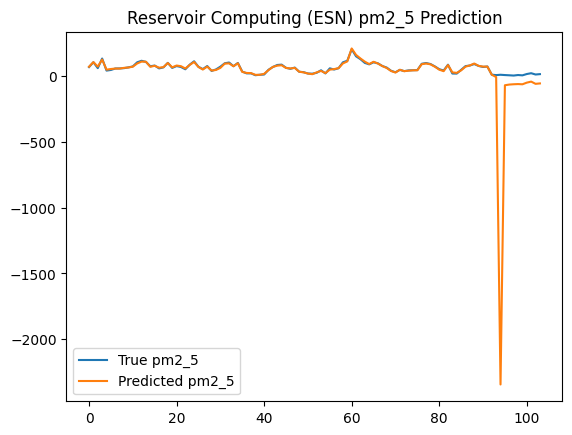

In [ ]:
mp.plot(time,y_test, label="True pm2_5")
mp.plot(time,y_pred, label="Predicted pm2_5")
mp.legend()
mp.title("Reservoir Computing (ESN) pm2_5 Prediction")
mp.show()

LSTM

CROSS CITY (LESS MORE MOD POLL)

In [ ]:
lookback = 1
forecast_steps = 10

X_all = []
Y_all = []


for i in range(len(y) - lookback - forecast_steps):
    X = x[i + lookback - 1]
    Y = y[i + lookback:i + lookback + forecast_steps]
    X_all.append(X)
    Y_all.append(Y)

X_all = np.array(X_all)
Y_all = np.array(Y_all)
print(X_all)

x_train, x_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.2, shuffle=False)

[[-1.14060005 -1.31626618 -0.41223318 ... -0.73045642 -0.89472645
  -0.80507255]
 [ 0.13868338  0.84055198 -0.41223318 ...  1.5010252  -0.32703629
   1.89829321]
 [-0.50095833  0.28595479 -0.14552841 ...  0.47826279 -0.39385533
   0.64751356]
 ...
 [ 0.77832509  1.94983869 -0.43445858 ...  2.29715275  1.27607725
   1.60609427]
 [ 0.77832509  1.21034499 -0.43445858 ... -0.30043131  1.15574866
  -0.47083059]
 [-1.14060005 -0.42270745 -0.41223318 ... -0.99776932 -0.77494111
  -0.91858868]]


In [ ]:
model = Sequential([
    Input(shape=(1, x_train.shape[1])),
    LSTM(64, activation='relu'),
    Dense(forecast_steps)
])

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,338 (75.54 KB)

 Trainable params: 19,338 (75.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_lstm_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
X_lstm_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

model.fit(X_lstm_train, y_train, epochs=100, batch_size=50, validation_split=0.1, verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1759.3225 - val_loss: 229.5819
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1765.9546 - val_loss: 228.3034
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1755.0991 - val_loss: 226.7494
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1861.6735 - val_loss: 224.7656
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1943.5769 - val_loss: 222.1163
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1808.4496 - val_loss: 218.6234
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1808.4911 - val_loss: 214.0594
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1803.4192 - val_loss: 208.2182
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1617.6243 - val_loss: 201.0394
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1633.0277 - val_loss: 192.3255
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1489.7313 - val_loss: 182.5103
Epoch 

In [ ]:
Y_pred_lstm = model.predict(X_lstm_test)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [ ]:
time=np.linspace(0,len(y_test[0]),len(y_test[0]))

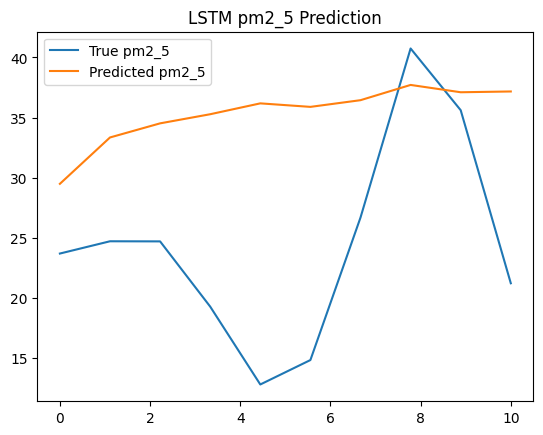

In [ ]:
mp.plot(time,y_test[0], label="True pm2_5")
mp.plot(time,Y_pred_lstm[0], label="Predicted pm2_5")
mp.legend()
mp.title("LSTM pm2_5 Prediction")
mp.show()